## TF_IDF for Keyword Extraction


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk

# Download stopwords if not already downloaded
# nltk.download('stopwords')

In [2]:
def wrangle(df_path):
    
    column_names = ["iD", "entity", "sentiment", "text"]
    df = pd.read_csv(df_path,names=column_names)

    df = pd.read_csv("twitter_training.csv",names=column_names) # Reading csv file
    df= df.dropna()   # Drop rows with any missing values
    df= df.drop_duplicates()  # Drop duplicate rows
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
    return(df)

In [6]:
df = wrangle("twitter_training.csv")
df.head()

,iD,entity,sentiment,text
0,2401,Borderlands,Positive,"im getting borderlands murder ,"
1,2401,Borderlands,Positive,"I coming borders I kill all,"
2,2401,Borderlands,Positive,"im getting borderlands kill all,"
3,2401,Borderlands,Positive,"im coming borderlands murder all,"
4,2401,Borderlands,Positive,"im getting borderlands 2 murder all,"


## TF-IDF for keyword extraction

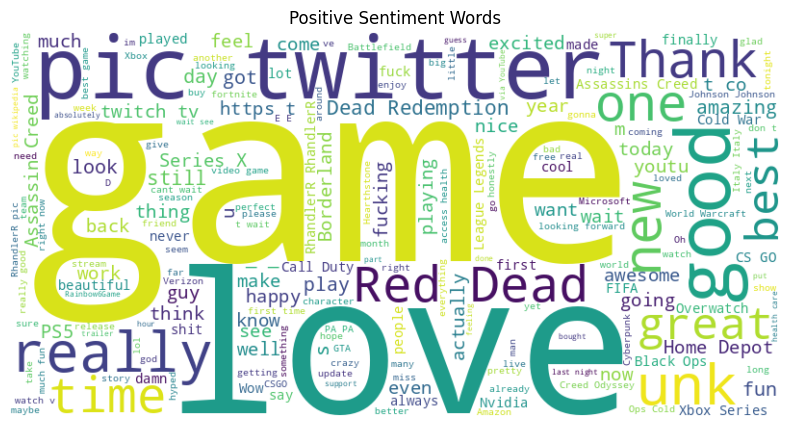

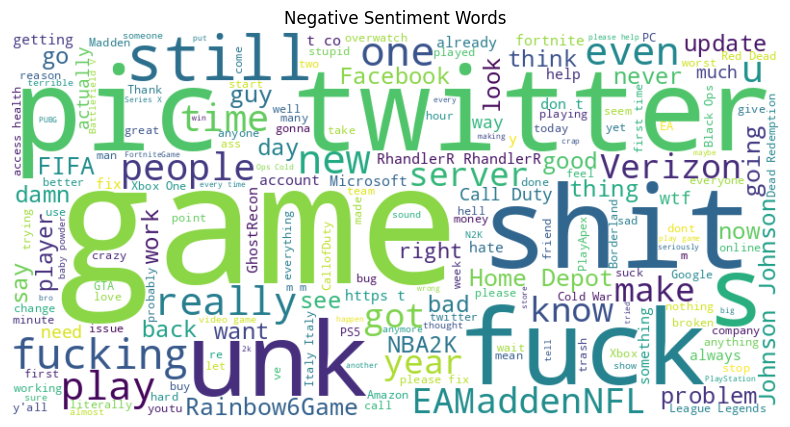

In [8]:
# Function to generate word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive sentiment word cloud
plot_wordcloud(df[df['sentiment'] == 'Positive']['text'], 'Positive Sentiment Words')

# Negative sentiment word cloud (if present in your data)
plot_wordcloud(df[df['sentiment'] == 'Negative']['text'], 'Negative Sentiment Words')


In [ ]:
#